In [21]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import spearmanr, pearsonr

import wrangle as w

In [2]:
df = w.wrangle_zillow()
df

,bedrooms,bathrooms,sq_ft,fips,year_built,tax_amount,tax_value
0,4.0,2.0,3633.0,6037.0,2005.0,6941.39,296425.0
1,3.0,4.0,1620.0,6037.0,2011.0,10244.94,847770.0
2,3.0,2.0,2077.0,6037.0,1926.0,7924.68,646760.0
3,3.0,1.0,1244.0,6037.0,1950.0,2532.88,169471.0
4,3.0,2.0,1300.0,6037.0,1950.0,3110.99,233266.0
...,...,...,...,...,...,...,...
2079446,3.0,2.5,1809.0,6059.0,2012.0,4181.10,405547.0
2079447,4.0,4.0,4375.0,6037.0,2015.0,13877.56,422400.0
2079448,4.0,3.0,2262.0,6059.0,2015.0,13494.52,960756.0
2079449,4.0,4.5,3127.0,6059.0,2014.0,6244.16,536061.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079451 entries, 0 to 2079450
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   sq_ft       float64
 3   fips        float64
 4   year_built  float64
 5   tax_amount  float64
 6   tax_value   float64
dtypes: float64(7)
memory usage: 126.9 MB


In [4]:
continuous_vars = ['sq_ft', 'tax_amount']

In [5]:
df['year_built'].nunique(), df['tax_amount'].nunique()

(153, 872319)

In [6]:
df['tax_value'].value_counts()

450000.0     800
500000.0     760
400000.0     710
430000.0     678
440000.0     664
            ... 
275620.0       1
247716.0       1
1352695.0      1
375167.0       1
536061.0       1
Name: tax_value, Length: 555822, dtype: int64

In [7]:
df[(df.bathrooms <= 6) & (df.bathrooms >= 1)]

,bedrooms,bathrooms,sq_ft,fips,year_built,tax_amount,tax_value
0,4.0,2.0,3633.0,6037.0,2005.0,6941.39,296425.0
1,3.0,4.0,1620.0,6037.0,2011.0,10244.94,847770.0
2,3.0,2.0,2077.0,6037.0,1926.0,7924.68,646760.0
3,3.0,1.0,1244.0,6037.0,1950.0,2532.88,169471.0
4,3.0,2.0,1300.0,6037.0,1950.0,3110.99,233266.0
...,...,...,...,...,...,...,...
2079446,3.0,2.5,1809.0,6059.0,2012.0,4181.10,405547.0
2079447,4.0,4.0,4375.0,6037.0,2015.0,13877.56,422400.0
2079448,4.0,3.0,2262.0,6059.0,2015.0,13494.52,960756.0
2079449,4.0,4.5,3127.0,6059.0,2014.0,6244.16,536061.0


In [8]:
df[(df.bedrooms <= 6) & (df.bedrooms > 0)]

,bedrooms,bathrooms,sq_ft,fips,year_built,tax_amount,tax_value
0,4.0,2.0,3633.0,6037.0,2005.0,6941.39,296425.0
1,3.0,4.0,1620.0,6037.0,2011.0,10244.94,847770.0
2,3.0,2.0,2077.0,6037.0,1926.0,7924.68,646760.0
3,3.0,1.0,1244.0,6037.0,1950.0,2532.88,169471.0
4,3.0,2.0,1300.0,6037.0,1950.0,3110.99,233266.0
...,...,...,...,...,...,...,...
2079446,3.0,2.5,1809.0,6059.0,2012.0,4181.10,405547.0
2079447,4.0,4.0,4375.0,6037.0,2015.0,13877.56,422400.0
2079448,4.0,3.0,2262.0,6059.0,2015.0,13494.52,960756.0
2079449,4.0,4.5,3127.0,6059.0,2014.0,6244.16,536061.0


In [9]:
df

,bedrooms,bathrooms,sq_ft,fips,year_built,tax_amount,tax_value
0,4.0,2.0,3633.0,6037.0,2005.0,6941.39,296425.0
1,3.0,4.0,1620.0,6037.0,2011.0,10244.94,847770.0
2,3.0,2.0,2077.0,6037.0,1926.0,7924.68,646760.0
3,3.0,1.0,1244.0,6037.0,1950.0,2532.88,169471.0
4,3.0,2.0,1300.0,6037.0,1950.0,3110.99,233266.0
...,...,...,...,...,...,...,...
2079446,3.0,2.5,1809.0,6059.0,2012.0,4181.10,405547.0
2079447,4.0,4.0,4375.0,6037.0,2015.0,13877.56,422400.0
2079448,4.0,3.0,2262.0,6059.0,2015.0,13494.52,960756.0
2079449,4.0,4.5,3127.0,6059.0,2014.0,6244.16,536061.0


In [10]:
df[df.tax_value < 2_000_000]

,bedrooms,bathrooms,sq_ft,fips,year_built,tax_amount,tax_value
0,4.0,2.0,3633.0,6037.0,2005.0,6941.39,296425.0
1,3.0,4.0,1620.0,6037.0,2011.0,10244.94,847770.0
2,3.0,2.0,2077.0,6037.0,1926.0,7924.68,646760.0
3,3.0,1.0,1244.0,6037.0,1950.0,2532.88,169471.0
4,3.0,2.0,1300.0,6037.0,1950.0,3110.99,233266.0
...,...,...,...,...,...,...,...
2079446,3.0,2.5,1809.0,6059.0,2012.0,4181.10,405547.0
2079447,4.0,4.0,4375.0,6037.0,2015.0,13877.56,422400.0
2079448,4.0,3.0,2262.0,6059.0,2015.0,13494.52,960756.0
2079449,4.0,4.5,3127.0,6059.0,2014.0,6244.16,536061.0


In [11]:
def outlier_remove(df):

    df = df[(df.bedrooms <= 6) & (df.bedrooms > 0)]
    
    df = df[(df.bathrooms <= 6) & (df.bathrooms >= 1)]

    df = df[df.tax_value < 2_000_000]

    df = df[df.sq_ft < 10000]

    return df

In [12]:
cdf = 2_140_235 - 2_089_329 

In [13]:
cdf/ 2140235

0.02378523853688964

### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [14]:
train, validate, test = w.train_val_test(df)

train.shape, validate.shape, test.shape

((1455615, 7), (727807, 7), (727808, 7))

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455615 entries, 553891 to 1944437
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1455615 non-null  float64
 1   bathrooms   1455615 non-null  float64
 2   sq_ft       1455615 non-null  float64
 3   fips        1455615 non-null  float64
 4   year_built  1455615 non-null  float64
 5   tax_amount  1455615 non-null  float64
 6   tax_value   1455615 non-null  float64
dtypes: float64(7)
memory usage: 88.8 MB


### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [16]:
def plot_variable_pairs(df):
    sns.pairplot(data = df.sample(2000), kind='reg', diag_kind='hist')
    
    return plt.show()

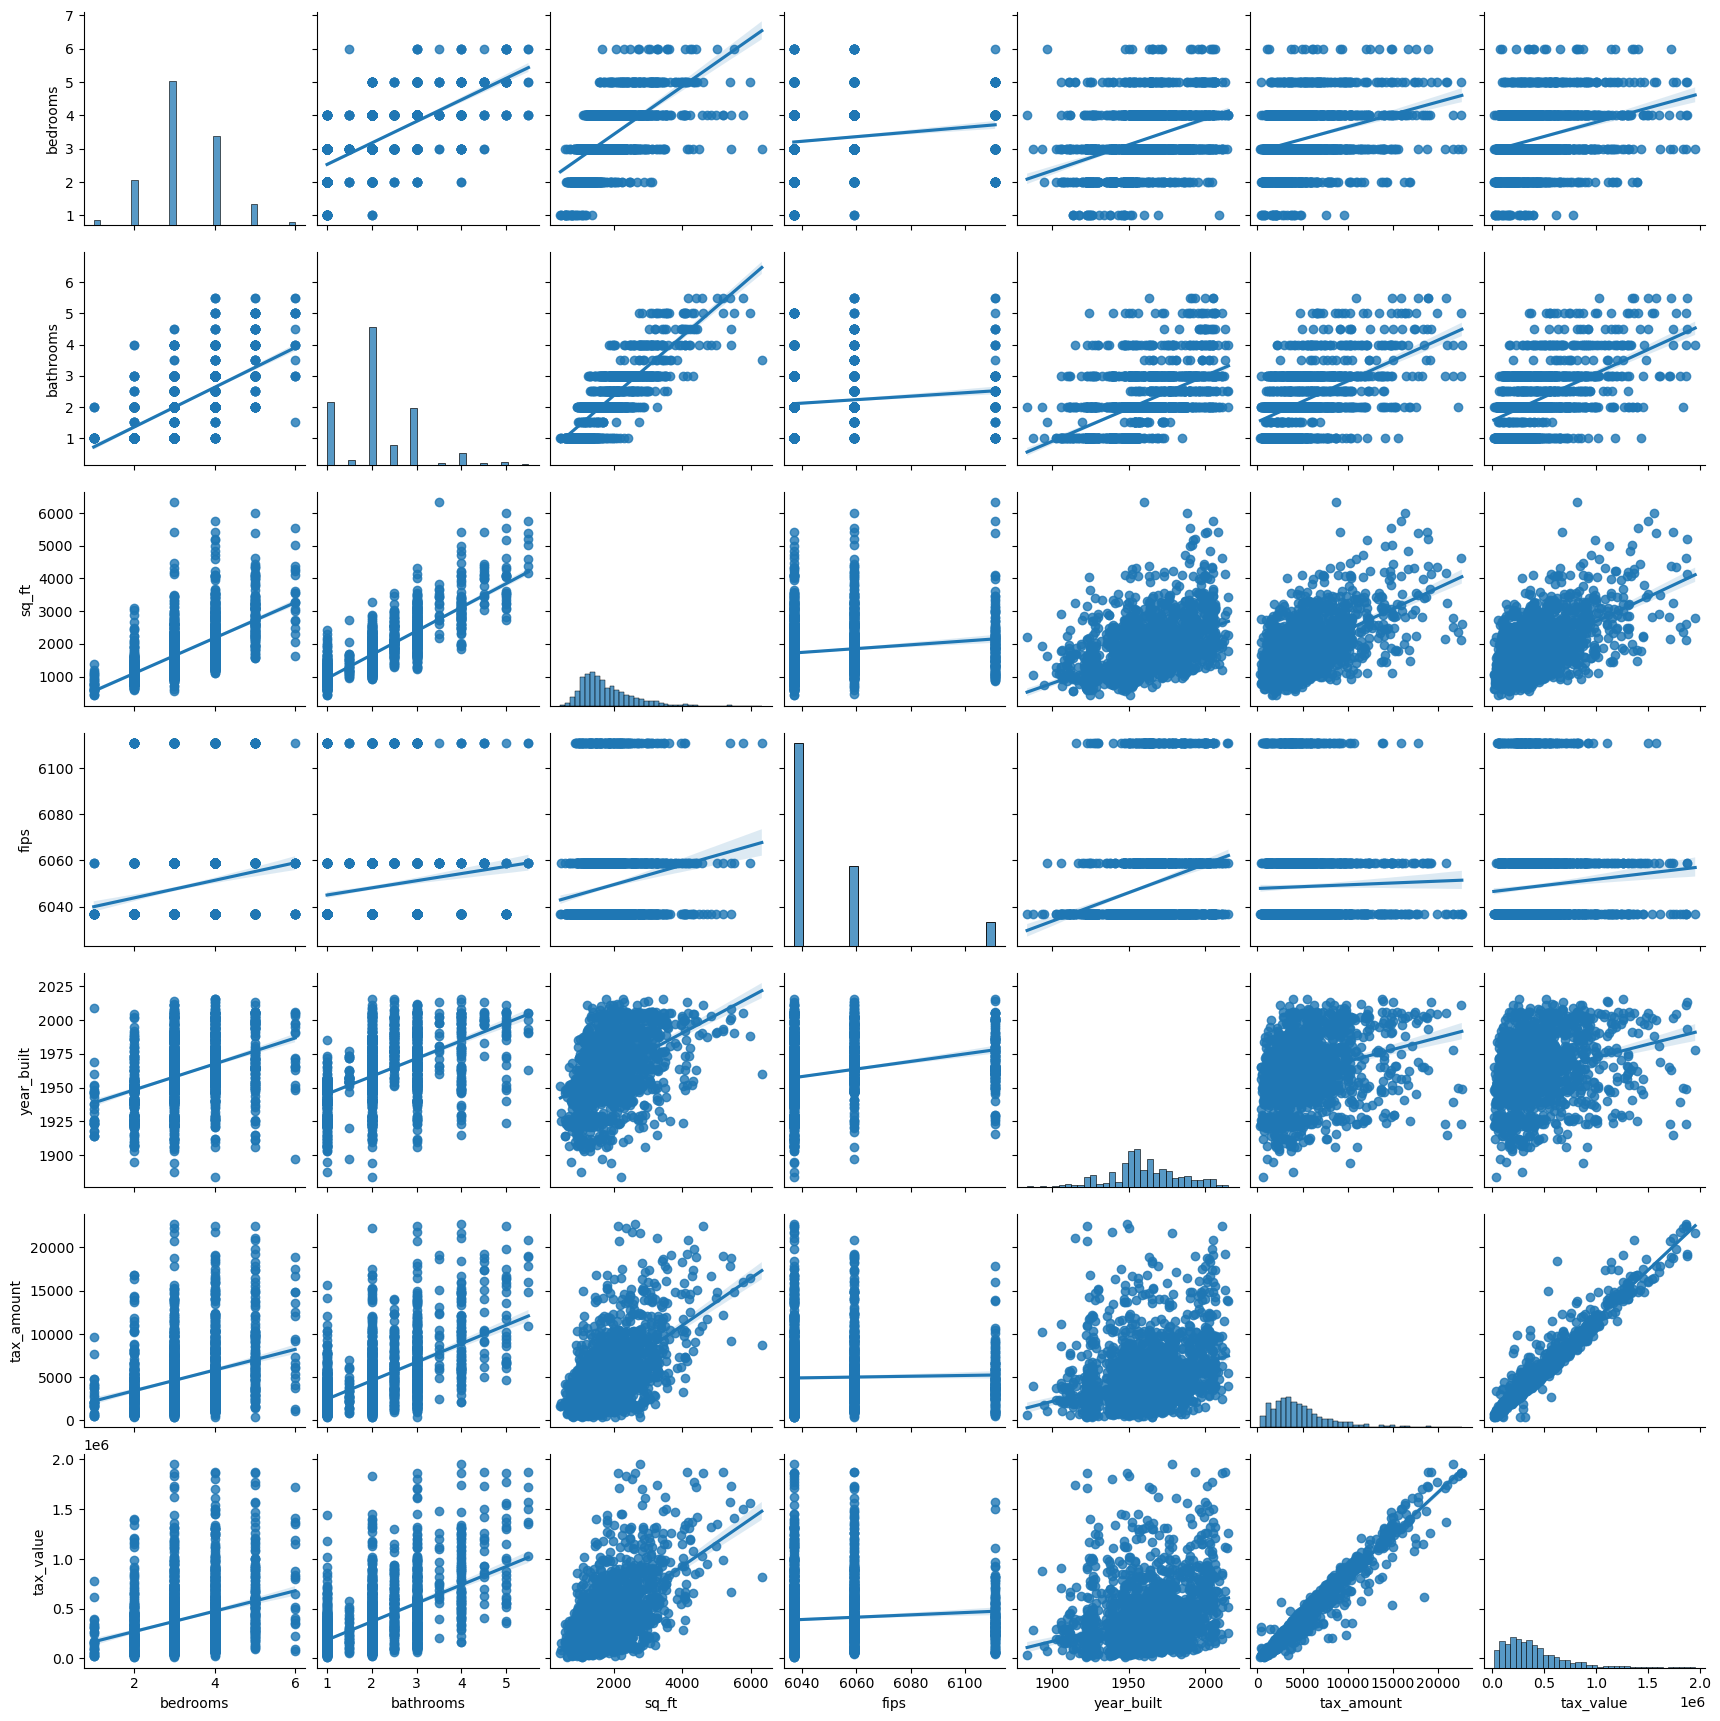

In [17]:
plot_variable_pairs(train)

### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [18]:
def plot_categorical_and_continuous_vars(df, cat, cont):
    
    df_sample = df.sample(2000)
    
    sns.barplot(x=cat, y=cont, data=df_sample)
    plt.figure()

    sns.stripplot(x=cat, y=cont, data=df_sample)
    plt.figure()
    
    sns.boxplot(x=cat, y=cont, data=df_sample)
    plt.figure()
    
    
    return plt.show()

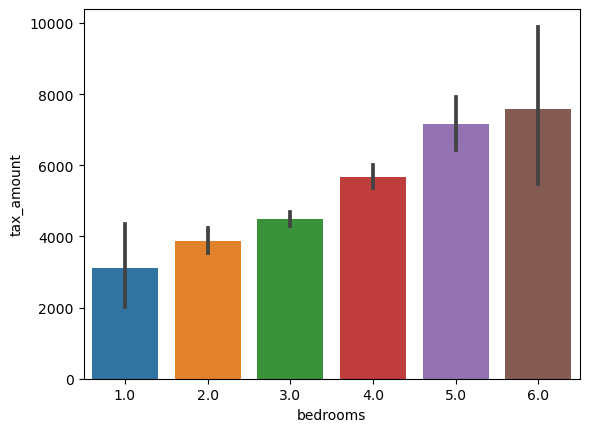

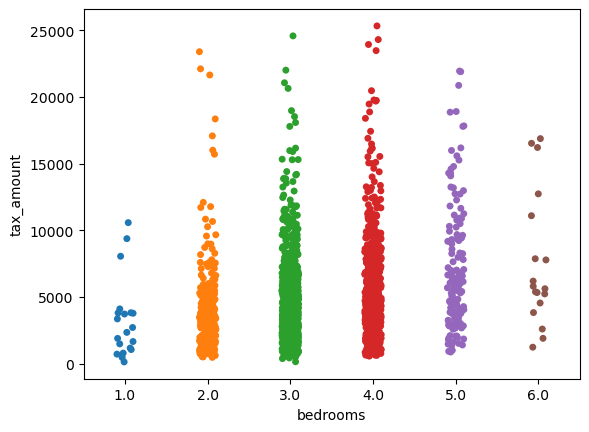

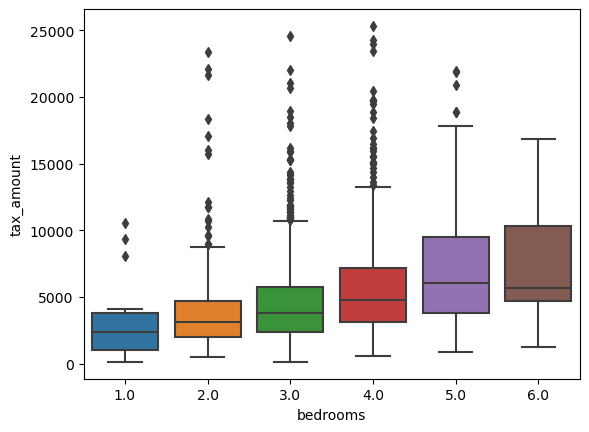

<Figure size 640x480 with 0 Axes>

In [19]:
plot_categorical_and_continuous_vars(train, 'bedrooms', 'tax_amount')

### 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

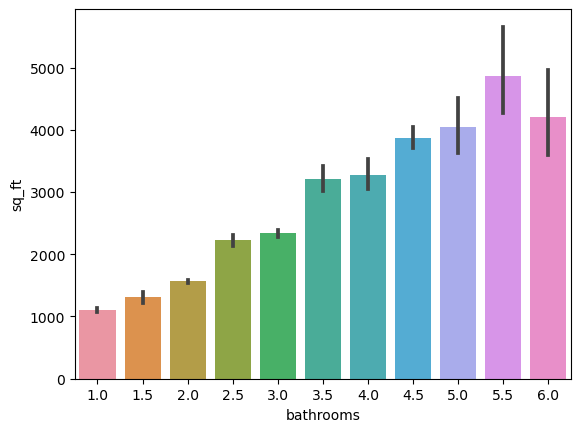

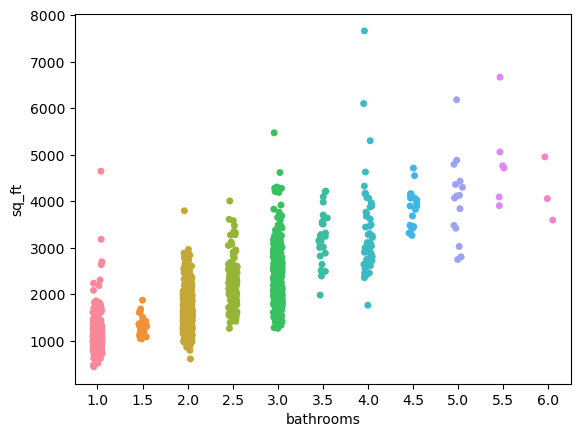

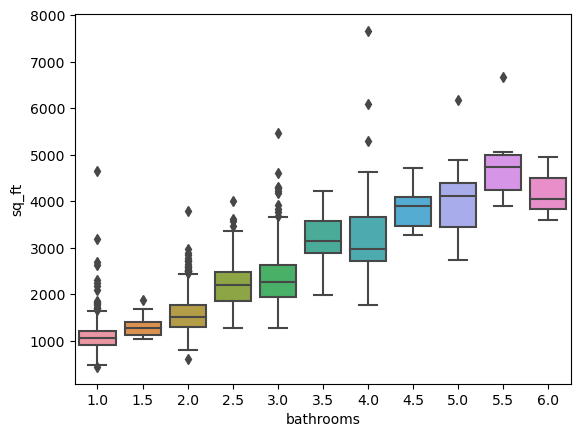

<Figure size 640x480 with 0 Axes>

In [20]:
w.plot_categorical_and_continuous_vars(train, 'bathrooms', 'sq_ft')

### 7. Come up with some initial hypotheses based on your goal of predicting property value.

$H_0$: 3 bedrooms in a house the < the tax_value. (less than or equal)

$H_a$: 3 or more bedrooms in a house >= the tax_value. (greater than)


### 8. Visualize all combinations of variables in some way.

In [88]:
corr_data = train.corr()
corr_data

,bedrooms,bathrooms,sq_ft,fips,year_built,tax_amount,tax_value
bedrooms,1.000000,0.624434,0.615397,0.150737,0.387543,0.275743,0.274166
bathrooms,0.624434,1.000000,0.822104,0.125323,0.536420,0.512692,0.511162
sq_ft,0.615397,0.822104,1.000000,0.131165,0.478505,0.583948,0.587381
fips,0.150737,0.125323,0.131165,1.000000,0.305375,0.031456,0.078969
year_built,0.387543,0.536420,0.478505,0.305375,1.000000,0.282214,0.275715
tax_amount,0.275743,0.512692,0.583948,0.031456,0.282214,1.000000,0.976328
tax_value,0.274166,0.511162,0.587381,0.078969,0.275715,0.976328,1.000000


### 9. Run the appropriate statistical tests where needed.

In [90]:
train['fips'].value_counts()

6037.0    970610
6059.0    373977
6111.0    111028
Name: fips, dtype: int64

In [86]:
t, p = stats.ttest_1samp(train[train['bedrooms'] > 2]['tax_value'], train['tax_value'].mean())
t, p

(71.0558920570119, 0.0)

In [87]:
𝜶 = 0.05

if t < 0 and p/2 < 𝜶:
    print('Reject the null hypothesis')
else:
    print('We fail to reject null hypothesis')

We fail to reject null hypothesis


In [69]:
for i in train.columns:
    
    𝜶 = 0.05
    
    t, p = stats.spearmanr(train[i], train.tax_value)
    
    print(f'{i} t:{t}, {i} p:{p}')
    print('\n')

bedrooms t:0.27151715542938243, bedrooms p:0.0


bathrooms t:0.4537518468873961, bathrooms p:0.0


sq_ft t:0.49636075031406535, sq_ft p:0.0


fips t:0.15987441844558706, fips p:0.0


year_built t:0.28361941513191924, year_built p:0.0


tax_amount t:0.9773454107674343, tax_amount p:0.0


tax_value t:1.0, tax_value p:0.0




### 10. What independent variables are correlated with the dependent variable, home value?

### 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

### 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

### 13. Explore your dataset with any other visualizations you think will be helpful.